<a href="https://colab.research.google.com/github/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-29/blob/main/Redneuronal_Equipo29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   Eduardo Gabriel Arévalo Aguilar - A01793897
*   José Javier Granados Hernández - A00566717
*   Ernesto Enriquez Rubio - A01228409
*   Roberto Romero Vielma - A00822314  


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [34]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor

from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

#**Ejercicio-1.** 
En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las 
mejores en el artículo antes citado:  ‘Lifetime People who have liked a Page and engaged with a 
post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables 
que indican los autores en la Tabla 3 del artículo citado. 

In [35]:
file="https://raw.githubusercontent.com/rromerov/Machine-Learning-Projects/main/dataset_Facebook.csv"
fb=pd.read_table(file,sep=";")

In [36]:
fb.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Renombramos la columna Lifetime People who have liked a Page and engaged with a post con LPE

In [37]:
fb.rename(columns={"Lifetime People who have liked your Page and engaged with your post":"LPE"},inplace=True)

Seleccionamos las columnas que nos interesan

In [38]:
columns_of_interest=["Category","Page total likes","Type","Post Month","Post Hour","Post Weekday","Paid","LPE"]
fb=fb[columns_of_interest]
X=fb.iloc[:,:-1:]
y=fb["LPE"]

In [39]:
X.head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
0,2,139441,Photo,12,3,4,0.0
1,2,139441,Status,12,10,3,0.0
2,3,139441,Photo,12,3,3,0.0
3,2,139441,Photo,12,10,2,1.0
4,2,139441,Photo,12,3,2,0.0


In [40]:
y.head()

0     119
1    1108
2     132
3    1386
4     396
Name: LPE, dtype: int64

#**Ejercicio-2.**
Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y 
validación.  

In [41]:
X_tv, X_test, y_tv,y_test=train_test_split(X,y,test_size=100,random_state=1)


In [42]:
len(X_tv) #Datos de Entrenamiento y Validación

400

In [43]:
len(X_test) #Datos de Prueba

100

#**Ejercicio-3.**
Definirás tus propias funciones de errores para este problema de regresión. Los errores que 
utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el 
error porcentual absoluto medio MAPE. 

In [44]:
def mi_RMSE(y,y_pred):
  MSE=np.mean(np.square(y-y_pred))
  RMSE=np.sqrt(MSE)
  return RMSE

def mi_MAE(y,y_pred):
  MAE=np.mean(np.abs(y-y_pred))
  return MAE

def mi_MAPE(y,y_pred):
  MAPE=np.mean(np.abs((y-y_pred)/y))*100
  return MAPE

#**Ejercicio-4.**
En la página de la UCI, así como en el artículo de los autores previamente citado encuentras 
información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo 
las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. 
Utiliza un Pipeline para evitar el filtrado de información. 

**Análisis de datos**


Visualizamos el dataset

In [45]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          500 non-null    int64  
 1   Page total likes  500 non-null    int64  
 2   Type              500 non-null    object 
 3   Post Month        500 non-null    int64  
 4   Post Hour         500 non-null    int64  
 5   Post Weekday      500 non-null    int64  
 6   Paid              499 non-null    float64
 7   LPE               500 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 31.4+ KB


In [46]:
fb.describe()

,Category,Page total likes,Post Month,Post Hour,Post Weekday,Paid,LPE
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.000000
mean,1.880000,123194.176000,7.038000,7.840000,4.150000,0.278557,609.986000
std,0.852675,16272.813214,3.307936,4.368589,2.030701,0.448739,612.725618
min,1.000000,81370.000000,1.000000,1.000000,1.000000,0.000000,9.000000
25%,1.000000,112676.000000,4.000000,3.000000,2.000000,0.000000,291.000000
50%,2.000000,129600.000000,7.000000,9.000000,4.000000,0.000000,412.000000
75%,3.000000,136393.000000,10.000000,11.000000,6.000000,1.000000,656.250000
max,3.000000,139441.000000,12.000000,23.000000,7.000000,1.000000,4376.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d0b743d50>,
      dtype=object)

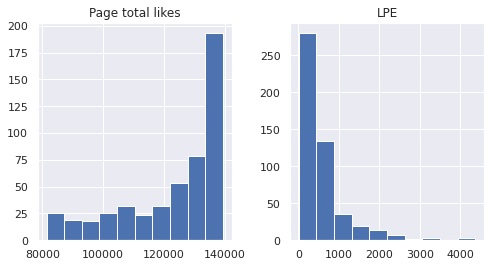

In [47]:
fb[["Page total likes","LPE"]].hist()

In [48]:
fb.head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid,LPE
0,2,139441,Photo,12,3,4,0.0,119
1,2,139441,Status,12,10,3,0.0,1108
2,3,139441,Photo,12,3,3,0.0,132
3,2,139441,Photo,12,10,2,1.0,1386
4,2,139441,Photo,12,3,2,0.0,396


In [49]:
fb.Category.unique()

array([2, 3, 1])

In [50]:
numeric_features=["Page total likes"]
numeric_pipeline = Pipeline(
    steps=[("Mednum", SimpleImputer(strategy="median")), ("Stdscaler",StandardScaler())])


categorical_features =["Type","Category"]
categorical_pipeline=Pipeline(
    steps=[("Modacat", SimpleImputer(strategy="most_frequent")),("OHEcat",OneHotEncoder(handle_unknown="ignore"))]
)

ordinal_features=["Post Month","Post Hour","Post Weekday"]
ordinal_pipeline=Pipeline(
    # steps=[("Modaord",SimpleImputer(strategy="most_frequent")),("OHEord",OneHotEncoder(handle_unknown="ignore"))]
    steps=[("Modaord",SimpleImputer(strategy="most_frequent"))]

)


# binary_features=["Paid"]
# binary_pipeline=Pipeline(
#     steps=[("Modabi",SimpleImputer(strategy="most_frequent")),("OHEbi", OneHotEncoder(handle_unknown="ignore"))]
# )      

binary_features=["Paid"]
binary_pipeline=Pipeline(
    steps=[("Modabi",SimpleImputer(strategy="most_frequent"))]
)     

columnasTransformer = ColumnTransformer(transformers = [('numpipe', numeric_pipeline, numeric_features),
                                                        ('catpipe', categorical_pipeline, categorical_features),
                                                        ('ordpipe', ordinal_pipeline, ordinal_features),
                                                        ('binpipe', binary_pipeline, binary_features)],
                                        remainder="passthrough")

# X_tv, X_test, y_tv,_y_test=train_test_split(X,y,test_size=100,random_state=1)
target_scaler = MinMaxScaler(feature_range=(10,100))
y_tv_in = np.array(y_tv).reshape(-1,1)
y_test_in = np.array(y_test).reshape(-1,1)
target_scaler.fit(np.array(y_tv).reshape(-1,1))

#Scale targets
y_tv =   target_scaler.transform(y_tv_in).ravel()
y_test = target_scaler.transform(y_test_in).ravel()

#**Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de 
datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para 
entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y 
validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la 
actividad. Consulta su documentación correspondiente:  
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html  

In [51]:
X_train, X_val, y_train, y_val=train_test_split(X_tv,y_tv,test_size=100,random_state=1)


dummy_regr = DummyRegressor(strategy="mean")
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',dummy_regr)])


pipeline.fit(X_train, y_train)  
# RMSE-rrores del Train:

print("Entrenamiento")
train_yhat = pipeline.predict(X_train)
train_mse = mi_RMSE(y_train, train_yhat)          
print("RMSE:",train_mse)

# MAE-errores del Train:
train_yhat = pipeline.predict(X_train)
train_mae = mi_MAE(y_train, train_yhat)          
print("MAE: ",train_mae)

# MAPE-errores del Train:
train_yhat = pipeline.predict(X_train)
train_mape = mi_MAPE(y_train, train_yhat)          
print("MAPE:",train_mape) 
print("                   ")
print("Validación")
# RMSE-errores del Validation:
val_yhat = pipeline.predict(X_val)
val_mse = mi_RMSE(y_val, val_yhat)          
print("RMSE:",val_mse)

# MAE-errores del Validation:
val_yhat = pipeline.predict(X_val)
val_mae = mi_MAE(y_val, val_yhat)          
print("MAE: ",val_mae)

# MAPE-errores del Validation:
val_yhat = pipeline.predict(X_val)
val_mape = mi_MAPE(y_val, val_yhat)          
print("MAPE:",val_mape)


Entrenamiento
RMSE: 12.95371353807711
MAE:  8.082742167556278
MAPE: 34.724573143140105
                   
Validación
RMSE: 12.51331931759724
MAE:  8.498660942213972
MAPE: 36.60114880863709


#**Ejercicio-6.**
Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con 
sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada 
(RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de 
información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor 
modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o 
subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de 
iteraciones para que todos los modelos converjan.

In [52]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Lineal:
  modelos.append(LinearRegression())
  nombres.append('LR')

  # RF . Bosque Aleatorio
  modelos.append(RandomForestRegressor())
  nombres.append('RF')

  #RNM Red Neuronal Multicapa
  modelos.append(MLPRegressor(max_iter=5000))
  nombres.append("RNM")

  return modelos, nombres

In [53]:
modelos, nombres = get_models()  
resultadosLDR = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])
  mismetricas={"RMSE":make_scorer(mi_RMSE),"MAE":make_scorer(mi_MAE),"MAPE":make_scorer(mi_MAPE)}
  kfold = RepeatedKFold(n_splits=3,n_repeats=5, random_state=0)

  resultados = cross_validate(pipeline, X_tv, np.ravel(y_tv), scoring=mismetricas, cv=kfold, error_score="raise",return_train_score=True)
  resultadosLDR.append(resultados) 

  print("Validación \n") 
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados['test_RMSE']),
                                                                          np.std(resultados['test_RMSE']), 
                                                                          np.mean(resultados['test_MAE']),
                                                                          np.std(resultados['test_MAE']),
                                                                          np.mean(resultados['test_MAPE']),
                                                                          np.std(resultados['test_MAPE']),                                                                             
                                                                          ))
  print("Entrenamiento \n") 
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i], 
                                                                          np.mean(resultados['train_RMSE']), 
                                                                          np.std(resultados['train_RMSE']),  
                                                                          np.mean(resultados['train_MAE']), 
                                                                          np.std(resultados['train_MAE']), 
                                                                          np.mean(resultados['train_MAPE']), 
                                                                          np.std(resultados['train_MAPE']),
                                                                        ))


Validación 

LR:
mean RMSE: 10.580 (1.0765)
mean MAE: 6.414 (0.4707)
mean MAPE: 27.635 (2.8976)

Entrenamiento 

LR:
mean RMSE: 10.087 (0.5125)
mean MAE: 6.023 (0.2769)
mean MAPE: 25.921 (1.2638)

Validación 

RF:
mean RMSE: 11.745 (1.0640)
mean MAE: 7.193 (0.4346)
mean MAPE: 31.199 (3.2075)

Entrenamiento 

RF:
mean RMSE: 4.352 (0.2534)
mean MAE: 2.617 (0.1510)
mean MAPE: 11.354 (0.6935)

Validación 

RNM:
mean RMSE: 11.179 (1.1090)
mean MAE: 6.930 (0.5465)
mean MAPE: 29.975 (3.4733)

Entrenamiento 

RNM:
mean RMSE: 8.821 (0.6375)
mean MAE: 5.468 (0.4048)
mean MAPE: 23.594 (1.6822)



<font color="royalblue">El modelo que presenta un mejor resultado es el de la **regresión lineal**, teniendo un MAPE de 25.92 en el conjunto de entrenamiento y un 27.63 en el MAPE de validación, en nuestra opinión el modelo que presenta mayor sobreentrenamiento es el de **Random Forest** dado que presenta un MAPE de 11.34 en el entrenamiento y un score de 31.19 en el conjunto de validación, lo que indica que tiene muy buen performance en la etapa de entrenamiento, pero en la etapa de validación tiene unos resultados que se separan mucho de la etapa previa, mientras que el modelo de regresión no da indicios con el MAPE de estar subentrenado ni sobreentrenado, por lo que podría ser un modelo óptimo para posteriores análisis, el modelo **Multi-layer Perceptron** también se puede considerar como un modelo óptimo dado que la diferencia entre el conjunto de validación y el de entrenamiento no es muy grande.   </font>

#**Ejercicio-7.**
Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación 
obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que 
encuentran los autores del artículo citado al inicio. Incluye tus conclusiones. 

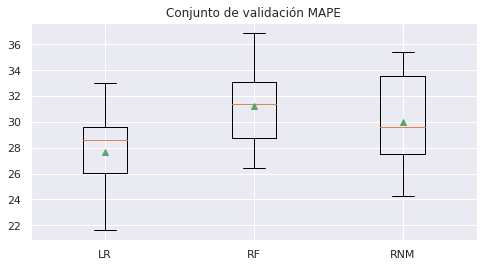

In [54]:
sns.set(rc={'figure.figsize':(8,4)})

bpMape = list()
for i in range(len(resultadosLDR)):
  rr = resultadosLDR[i]['test_MAPE']
  bpMape.append(np.abs(rr))
plt.title("Conjunto de validación MAPE")
plt.boxplot(bpMape, labels=nombres, showmeans=True)
plt.show()

<font color="royalblue">En las conclusiones del artículo se menciona que se obtuvo un MAPE de 26.9 en LPE, mientras que en nuestros resultados, en el conjunto de validación se obtuvo un resultado en los modelos de Regresión Lineal, Random Forest y Multi-layer Perceptron de 27.63, 31.19 y 29.97 respectivamente, lo que se encuentra dentro del rango expuesto en el artículo. </font> 

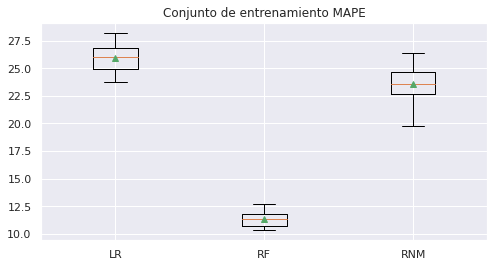

In [55]:
sns.set(rc={'figure.figsize':(8,4)})

bpMape = list()
for i in range(len(resultadosLDR)):
  rr = resultadosLDR[i]['train_MAPE']
  bpMape.append(rr)
plt.title("Conjunto de entrenamiento MAPE")
plt.boxplot(bpMape, labels=nombres, showmeans=True)
plt.show()

#**Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores 
hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los 
hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación 
cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados. 

In [56]:
mlp_model=MLPRegressor()
mlp_pipe=Pipeline(steps=[("Col", columnasTransformer),("model", mlp_model)])
mlp_kfold=RepeatedKFold(n_splits=5, n_repeats=3, random_state=1) 


# parameter_space = {"model__hidden_layer_sizes":[(11,11)],
#     "model__alpha":[0.0001],
#     "model__learning_rate_init":[0.001],
#     "model__max_iter":[20000]
# }

parameter_space = {"model__hidden_layer_sizes":[(5,5),(7,7),(11,11)],
    "model__alpha":[0.0001,0.0005,0.001],
    "model__learning_rate_init":[0.001,0.005,0.01],
    "model__max_iter":[20000]
}

gridmlp=GridSearchCV(estimator =  mlp_pipe, 
                            param_grid = parameter_space,
                            scoring = make_scorer(mi_MAPE), 
                            cv = mlp_kfold,
                            n_jobs=-1)

gridmlp.fit(X_tv,np.ravel(y_tv))

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('Col',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numpipe',
                                                                         Pipeline(steps=[('Mednum',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Stdscaler',
                                                                                          StandardScaler())]),
                                                                         ['Page '
                                                                          'total '
                                                                          'likes']),
                         

In [69]:
print("El mejor resultado es:",gridmlp.best_score_)
print("Los mejores parámetros son:",gridmlp.best_params_)

El mejor resultado es: 30.4174582056268
Los mejores parámetros son: {'model__alpha': 0.001, 'model__hidden_layer_sizes': (11, 11), 'model__learning_rate_init': 0.005, 'model__max_iter': 20000}


#**Ejercicio-9.**
Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de 
los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones. 

Feature: Category            , Score: 0.24775
Feature: Page total likes    , Score: 4.05897
Feature: Type                , Score: 12.92742
Feature: Post Month          , Score: 2.70448
Feature: Post Hour           , Score: 0.98018
Feature: Post Weekday        , Score: 1.01068
Feature: Paid                , Score: 0.40022


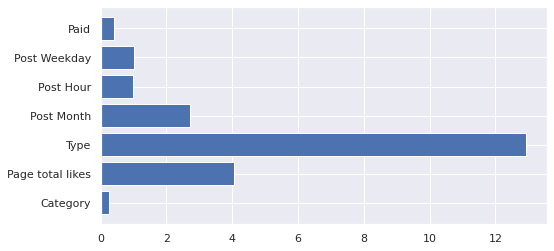

In [85]:
best_mlp_model = MLPRegressor(hidden_layer_sizes=gridmlp.best_params_.get("model__hidden_layer_sizes"), 
                            max_iter=gridmlp.best_params_.get("model__max_iter"), 
                            alpha=gridmlp.best_params_.get("model__alpha"),
                            learning_rate_init=gridmlp.best_params_.get("model__learning_rate_init"),
                            random_state=1)  

mlp_pipe_best=Pipeline(steps=[("Col", columnasTransformer),("mlp_model", best_mlp_model)])

mlp_pipe_best.fit(X_tv, y_tv)

importance = permutation_importance(mlp_pipe_best, X_tv, y_tv, n_repeats=10,random_state=1,scoring=make_scorer(mi_MAPE,greater_is_better=False))

for v,n in zip(importance['importances_mean'], list(X.columns)):
	print('Feature: {0:20}, Score: {1:.5f}'.format(n,np.abs(v)))

plt.barh(X.columns.to_numpy(),np.abs(importance["importances_mean"]))
plt.show()

<font color="royalblue"> En nuestro modelo la variable **Type** es la más importante con un score de 12.92, seguida de **Page total likes** con un score de 4.05 y la tercera más importante es **Post Month** con un score de 2.7, cabe aclarar que nuestra salida está escalada con un min-max scaler de 10 a 100. </font>

#**Ejercicio-10.**
Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores 
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más 
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de 
factores con este modelo con un diagrama de barras. 

In [59]:
modelo_rf=RandomForestRegressor() 
modelo_rf_pipe=Pipeline(steps=[("Col", columnasTransformer),("model", modelo_rf)])
rf_kfold=RepeatedKFold(n_splits=5, n_repeats=3, random_state=1) 

parameter_space =      {"model__max_depth":[10,15,20], 
                        "model__criterion":["squared_error", "absolute_error", "poisson"],
                        "model__max_features":["sqrt", "log2", None],
                        "model__ccp_alpha":[0.1,0.01,0.001]
     }

gridrf=GridSearchCV(estimator=modelo_rf_pipe,
                       param_grid=parameter_space,
                       scoring=make_scorer(mi_MAPE),
                       cv=rf_kfold)
gridrf.fit(X_tv, np.ravel(y_tv))   

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('Col',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numpipe',
                                                                         Pipeline(steps=[('Mednum',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Stdscaler',
                                                                                          StandardScaler())]),
                                                                         ['Page '
                                                                          'total '
                                                                          'likes']),
                         

In [60]:
print("El mejor resultado es:",gridrf.best_score_)
print("El mejor parámetro es:",gridrf.best_params_)

El mejor resultado es: 33.64615815024917
El mejor parámetro es: {'model__ccp_alpha': 0.001, 'model__criterion': 'poisson', 'model__max_depth': 20, 'model__max_features': None}


Feature: Category            , Score: 1.48221
Feature: Page total likes    , Score: 5.82258
Feature: Type                , Score: 11.13348
Feature: Post Month          , Score: 5.10854
Feature: Post Hour           , Score: 1.31985
Feature: Post Weekday        , Score: 1.52757
Feature: Paid                , Score: 1.68193


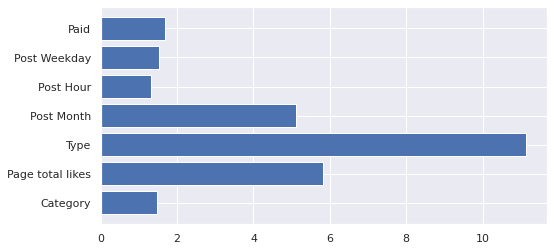

In [84]:
best_rf_model = RandomForestRegressor(max_depth=gridrf.best_params_.get("model__max_depth"),
                                      criterion=gridrf.best_params_.get("model__criterion"),
                                      max_features=gridrf.best_params_.get("model__max_features"),
                                      ccp_alpha=gridrf.best_params_.get("model__ccp_alpha"),
                                      random_state=1
)

best_rf_pipe=Pipeline(steps=[("Col", columnasTransformer),("rf_model", best_rf_model)])

estimator=best_rf_pipe.fit(X_tv, y_tv)

importance = permutation_importance(estimator, X_test, y_test, n_repeats=10,scoring=make_scorer(mi_MAPE,greater_is_better=False))

for v,n in zip(importance['importances_mean'], list(X.columns)):
	print('Feature: {0:20}, Score: {1:.5f}'.format(n,np.abs(v)))

plt.barh(X.columns.to_numpy(),np.abs(importance["importances_mean"]))
plt.show()

#**Ejercicio-11.**
Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores 
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más 
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de 
factores con este modelo con un diagrama de barras. 

In [62]:
modelo_mlr=LinearRegression() 
modelo_mlr_pipe=Pipeline(steps=[("Col", columnasTransformer),("model", modelo_mlr)])
mlr_kfold=RepeatedKFold(n_splits=5, n_repeats=3, random_state=1) 

parameter_space =      {"model__fit_intercept":[True,False], 
                        "model__positive":[False], #No usamos true porque salen warnings
                        # "model__normalize":[True,False]  #esto está comentanto porque el parámetro arroja warnings en cualquiera de sus 2 estados
                        }

gridmlr=GridSearchCV(estimator=modelo_mlr_pipe,
                       param_grid=parameter_space,
                       scoring=make_scorer(mi_MAPE),
                       cv=rf_kfold)
gridmlr.fit(X_tv, np.ravel(y_tv))   

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=Pipeline(steps=[('Col',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numpipe',
                                                                         Pipeline(steps=[('Mednum',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Stdscaler',
                                                                                          StandardScaler())]),
                                                                         ['Page '
                                                                          'total '
                                                                          'likes']),
                         

In [63]:
print("El mejor resultado es:",gridmlr.best_score_)
print("El mejor parámetro es:",gridmlr.best_params_)

El mejor resultado es: 27.12276599751302
El mejor parámetro es: {'model__fit_intercept': False, 'model__positive': False}


Feature: Category            , Score: 0.04074
Feature: Page total likes    , Score: 3.66784
Feature: Type                , Score: 11.57116
Feature: Post Month          , Score: 9.41328
Feature: Post Hour           , Score: 0.29820
Feature: Post Weekday        , Score: 0.10436
Feature: Paid                , Score: 0.25406


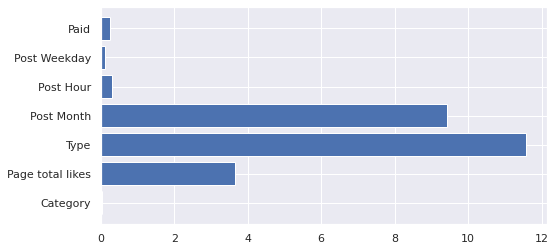

In [86]:
best_mlr_model = LinearRegression(fit_intercept=gridmlr.best_params_.get("fit_intercept"),
                                  positive=gridmlr.best_params_.get("positive"))
 
best_mlr_pipe=Pipeline(steps=[("Col", columnasTransformer),("mlr_model", best_mlr_model)])

estimator=best_mlr_pipe.fit(X_tv, y_tv)

importance = permutation_importance(estimator, X_test, y_test, n_repeats=10,scoring=make_scorer(mi_MAPE,greater_is_better=False))

for v,n in zip(importance['importances_mean'], list(X.columns)):
	print('Feature: {0:20}, Score: {1:.5f}'.format(n,np.abs(v)))

plt.barh(X.columns.to_numpy(),np.abs(importance["importances_mean"]))
plt.show()

#**Ejercicio-12.**
Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con 
respecto a MAPE. Incluye tus conclusiones finales de la actividad. 

<font color="royalblue">  Los 3 modelos desarrollados comparten similitudes con el modelo presentado en el artículo  </font>

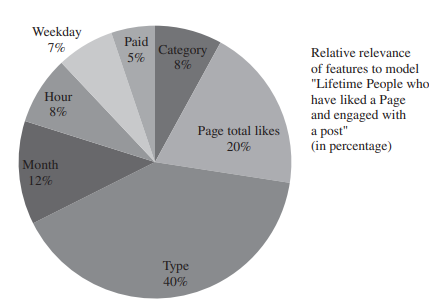

<font color="royalblue"> La columna **Type** es la **feature** más importante, seguida de **Pages total likes**, la tercera más importante es **Month**, tanto en los resultados del artículo, como en los modelos expuestos en el desarrollo de la actividad, ***es importante aclarar que nuestros datos de salida están escalados con la función Min-Max***, por lo cual los resultados varían en cuanto a la magnitud, pero no en el orden de importancia de las columnas.   </font>

###**Fin de la Actividad de la semana 7.**